In [46]:
import requests
import json
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
with open("config.json", "r") as f:
    config = json.loads(f.read())
api_key = config["api-key"]
season = "SEASON2017"

challenger_url = "https://na.api.pvp.net/api/lol/na/v2.5/league/challenger?type=RANKED_FLEX_SR&api_key={}".format(api_key)
stats_url = "https://na.api.pvp.net/api/lol/na/v1.3/stats/by-summoner/{id}/ranked?season={season}&api_key={key}"
champions_url = "https://global.api.pvp.net/api/lol/static-data/na/v1.2/champion?api_key={}".format(api_key)
summoner_url = "https://na.api.pvp.net/api/lol/NA/v1.4/summoner/by-name/{name}?api_key={key}"

In [15]:
def get_challenger_ids():
    challenger_data = requests.get(challenger_url).json()
    ids = []
    for entry in challenger_data['entries']:
        ids.append(entry['playerOrTeamId'])
    return ids
        
def get_champion_dict():
    return requests.get(champions_url).json()['data']

def get_champ_id(name, data_dict):
    return data_dict[name]['id']

def champ_id_to_name_dict(champion_dict):
    id_dict = {}
    for name in champion_dict.keys():
        id_dict[champion_dict[name]['id']] = name
    return id_dict

def get_user_stats(user):
    return requests.get(stats_url.format(id=user, season=season, key=api_key)).json()

def get_summoner_id(name):
    json_data = requests.get(summoner_url.format(key=api_key, name=name)).json()
    return json_data[name]['id']

def get_match_data_for_summoner(summoner_id, season, rankedQueues="RANKED_FLEX_SR"):
    url = "https://na.api.pvp.net/api/lol/NA/v2.2/matchlist/by-summoner/{id}?rankedQueues={ranked}&season={season}&api_key={key}" \
        .format(key=api_key, id=summoner_id, season=season, ranked=rankedQueues)
    json_data = requests.get(url).json()
    return json_data

def get_arrays_from_match_data(match_data, keys):
    array_dict = defaultdict(list)
    for match in match_data['matches']:
        for key in keys:
            array_dict[key].append(match[key])
    return array_dict

def get_match_data(match_id):
    url = "https://na.api.pvp.net/api/lol/NA/v2.2/match/{id}?includeTimeline=true&api_key={key}" \
        .format(id=match_id, key=api_key)
    json_data = requests.get(url).json()
    return json_data

## Team Analytics

In [16]:
summoner_id = get_summoner_id("mastersyrios")

In [17]:
match_data = get_match_data_for_summoner(summoner_id, season)

In [18]:
match_arrays = get_arrays_from_match_data(match_data, ['matchId', 'lane', 'role', 'timestamp'])

In [19]:
match_data = get_match_data(match_arrays['matchId'][0])

In [60]:
match_arrays['matchId'][0]

2451309769

In [55]:
rimble = '6'
syrios = '8'
brunore = '7'
total_gold_rimble = []
total_gold_syrios = []
total_gold_brunore = []
timestamps = []
for frame in match_data["timeline"]['frames']:
    total_gold_rimble.append(frame['participantFrames'][rimble]['totalGold'])
    total_gold_syrios.append(frame['participantFrames'][syrios]['totalGold'])
    total_gold_brunore.append(frame['participantFrames'][brunore]['totalGold'])
    timestamps.append(frame['timestamp'])

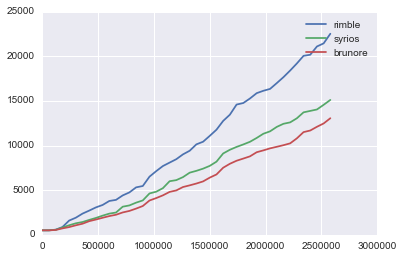

In [59]:
plt.plot(timestamps, total_gold_rimble, label="rimble")
plt.plot(timestamps, total_gold_syrios, label="syrios")
plt.plot(timestamps, total_gold_brunore, label="brunore")
plt.legend()

## Other

In [ ]:
champion_dict = get_champion_dict()
challenger_ids = get_challenger_ids()
id_to_name_dict = champ_id_to_name_dict(champion_dict)

In [ ]:
id_to_name_dict[51]

In [ ]:
zyra_id = get_champ_id("Zyra", champion_dict)

In [ ]:
x=get_user_stats(challenger_ids[0])

In [ ]:
x['champions'][0]

In [ ]:
challenger_data.keys()

In [ ]:
requests.get(stats_url.format(id=29293356, season=season, key=api_key)).json()